In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [15]:
import pandas as pd
new = pd.read_csv (r"C:\Users\Dell\Desktop\Machine Learning\Biochemical.csv")

In [16]:
new

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Data Manipulation

#### 2.1. Data Type and conversion

In [17]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


# 3. Missing Value Identify & Treatment

In [18]:
# count the number of NaN values in each column
print(new.isnull().sum())

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


# 4.Outlier identify & Treatment 

<AxesSubplot:>

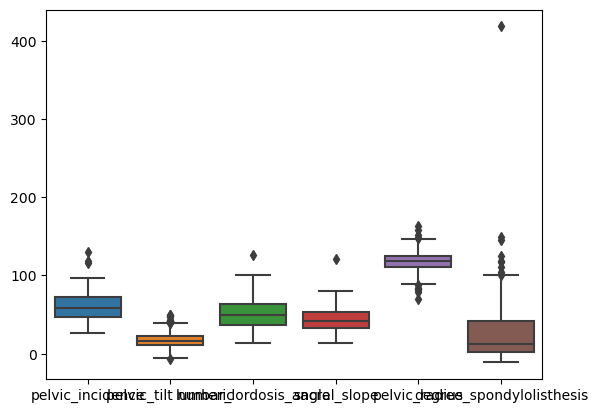

In [19]:
import seaborn as sns
sns.boxplot(data=new)

In [20]:
A=new.drop(['class'],axis=1)
A

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [21]:
for i in A:
    
    q1 = A[i].quantile(0.25)
    q3 = A[i].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low_limit = q1-1.5*iqr #acceptable range
    upper_limit = q3+1.5*iqr #acceptable range
    upper_limit
    low_limit
    for j in A[i]:
        if j<low_limit:
            A[i]=np.where(new[i] < low_limit,low_limit,new[i]) # low limit
        else:
            A[i]=np.where(new[i] > upper_limit,upper_limit,A[i]) # upper limit

In [22]:
A

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


<AxesSubplot:>

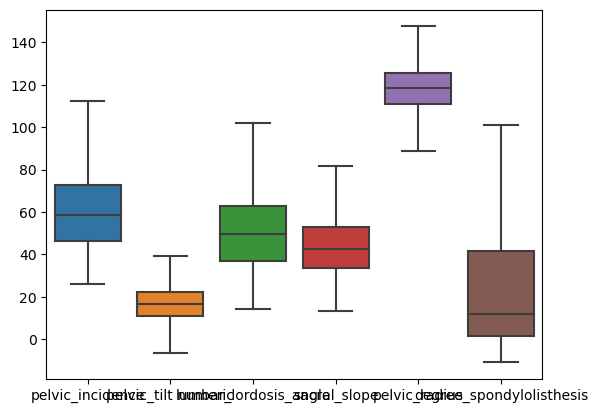

In [23]:
sns.boxplot(data=A)

In [27]:
B = new[new.select_dtypes(include=['object']).columns.tolist()]
B.head()

,class
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal


In [28]:
new = pd.concat([B,A],axis=1)

In [29]:
new.head()

,class,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,Abnormal,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,Abnormal,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,Abnormal,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,Abnormal,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,Abnormal,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


# Data Partition 

In [31]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = new.drop('class', axis = 1)
Y = new[['class']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

# Importance Features

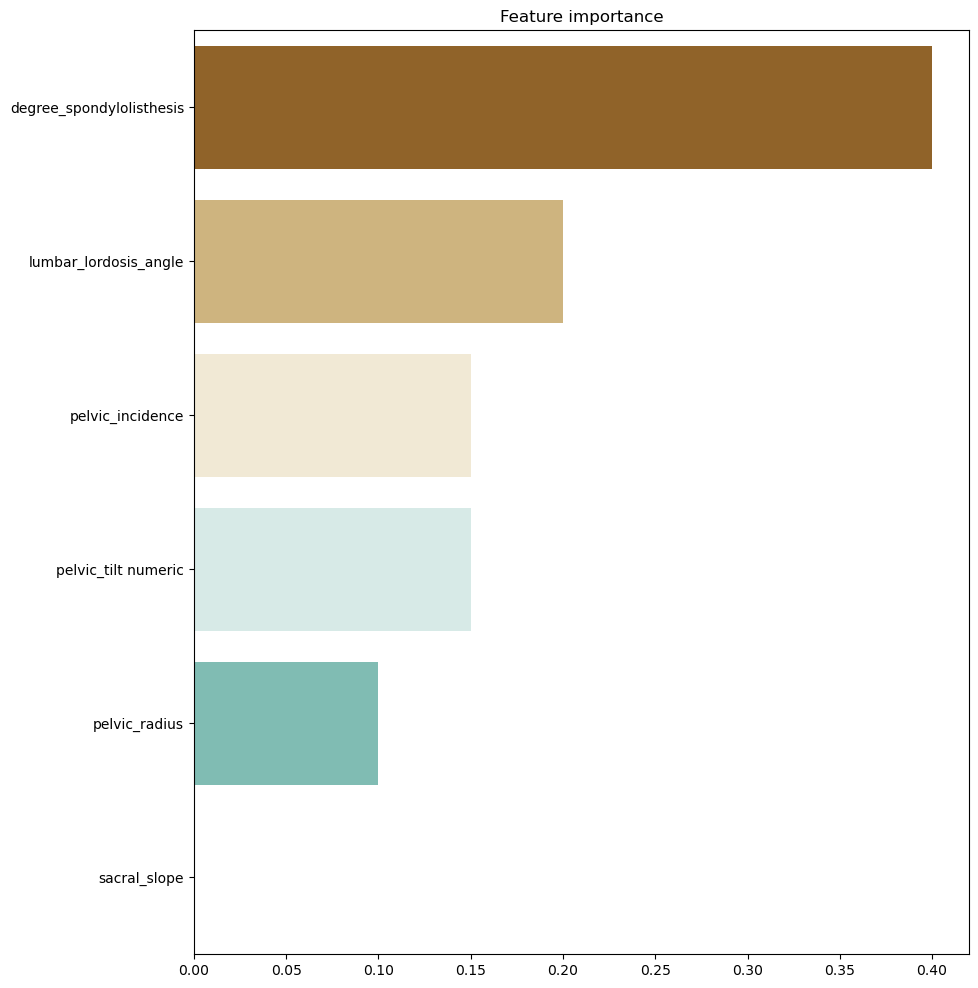

In [33]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')


# Random Forest Visualization

In [34]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [35]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [36]:
list(X.columns)

['pelvic_incidence',
 'pelvic_tilt numeric',
 'lumbar_lordosis_angle',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis']

In [37]:
new.rename(columns = {'class' : 'Class'}, inplace = True)
new

,Class,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,Abnormal,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,Abnormal,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,Abnormal,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,Abnormal,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,Abnormal,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...,...
305,Normal,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,Normal,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,Normal,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,Normal,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


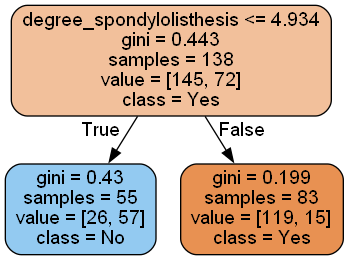

In [38]:
tree = Model.estimators_[5]  # specify the tree number   
Class=['Yes','No'] 
feature_list = list(X.columns)  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Class,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# Step 6 : Predictions on Train Dataset

In [39]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
71,86.900794,32.928168,47.794347,53.972627,135.075364,100.812790,Abnormal
181,64.624008,15.225303,67.632167,49.398705,90.298468,31.326411,Abnormal
51,74.433593,39.300383,27.700000,32.876262,107.949304,5.000089,Abnormal
291,51.079833,14.209935,35.951229,36.869898,115.803711,6.905090,Normal


In [40]:
train['Predicted']=Model.predict(X_train)
train.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,Predicted
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal,Abnormal
71,86.900794,32.928168,47.794347,53.972627,135.075364,100.812790,Abnormal,Abnormal
181,64.624008,15.225303,67.632167,49.398705,90.298468,31.326411,Abnormal,Abnormal
51,74.433593,39.300383,27.700000,32.876262,107.949304,5.000089,Abnormal,Abnormal
291,51.079833,14.209935,35.951229,36.869898,115.803711,6.905090,Normal,Abnormal


# Step 7 : Model Performance Metrics

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['class'], train['Predicted'])
print(confusion_matrix)

[[147   2]
 [ 43  25]]


In [43]:
Accuracy_Train=((147+25)/(217)*100)
print(Accuracy_Train)

79.26267281105991


In [44]:
from sklearn.metrics import classification_report
print(classification_report(train['class'], train['Predicted']))

              precision    recall  f1-score   support

    Abnormal       0.77      0.99      0.87       149
      Normal       0.93      0.37      0.53        68

    accuracy                           0.79       217
   macro avg       0.85      0.68      0.70       217
weighted avg       0.82      0.79      0.76       217



# Step 8 : Predictions on Test Dataset

In [45]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
179,68.721910,39.300383,68.056012,19.290046,125.018517,54.691289,Abnormal
221,54.950970,5.865353,53.000000,49.085617,126.970328,-0.631603,Normal
219,64.311867,26.328369,50.958964,37.983498,106.177751,3.118221,Normal
257,50.160078,-2.970024,42.000000,53.130102,131.802491,-8.290203,Normal
248,47.319648,8.573680,35.560252,38.745967,120.576972,1.630664,Normal


In [46]:
test['Predicted']=Model.predict(X_test)
test.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,Predicted
179,68.721910,39.300383,68.056012,19.290046,125.018517,54.691289,Abnormal,Abnormal
221,54.950970,5.865353,53.000000,49.085617,126.970328,-0.631603,Normal,Abnormal
219,64.311867,26.328369,50.958964,37.983498,106.177751,3.118221,Normal,Abnormal
257,50.160078,-2.970024,42.000000,53.130102,131.802491,-8.290203,Normal,Normal
248,47.319648,8.573680,35.560252,38.745967,120.576972,1.630664,Normal,Normal


# Step 9 : Model Performance Metrics on Test data 

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['class'])
print(confusion_matrix)

[[58 22]
 [ 3 10]]


In [48]:
Accuracy_test=((58+10)/(93)*100)
Accuracy_test

73.11827956989248

In [49]:
from sklearn.metrics import classification_report
print(classification_report(test['class'], test['Predicted']))

              precision    recall  f1-score   support

    Abnormal       0.72      0.95      0.82        61
      Normal       0.77      0.31      0.44        32

    accuracy                           0.73        93
   macro avg       0.75      0.63      0.63        93
weighted avg       0.74      0.73      0.69        93



# Finish